In [74]:
import pandas as pd
import numpy as np

train_datas=pd.read_csv("train.csv")
test_datas=pd.read_csv("test.csv")

In [75]:
train_datas.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [76]:
train_datas.shape

(891, 12)

In [77]:
test_datas.shape

(418, 11)

* 合并测试集和训练集，统一进行数据预处理  
原测试集行数：481，训练集行数：891

In [78]:
df_all=train_datas.append(test_datas,ignore_index = True,sort=True)
df_all.shape

(1309, 12)

In [79]:
labels=df_all['Survived']
features=df_all.drop(['Survived'],axis=1)

### 0. 观察数据特征

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [9]:
features.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000


#### 存在缺失值的数据列：Age ，Cabin，Embarked  ， Fare （survied为标签列）
#### 除了标签列之外，Age，Fare，Parch(同代直系亲属数)，PassengerId（乘客编号），Pclass(客舱等级)，SibSp(不同代直系亲属数) 都为数值型列，其余9列为分类型数据

数值型列中，Age，Fare 都属于典型的连续型数值列，可直接处理

In [11]:
print('Parch: ','\n',features.Parch.value_counts())
print('SibSp: ','\n',features.SibSp.value_counts())
print('Pclass: ','\n',features.Pclass.value_counts())

Parch:  
 0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64
SibSp:  
 0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64
Pclass:  
 3    709
1    323
2    277
Name: Pclass, dtype: int64


* Pclass列，虽然也是数值型，但属于明显的离散型数据，且带有分类特征，当作分类型数据处理
* Parch列和sibsp列也是离散型，但分类特性并不明显，这里暂且保留原数据不做处理（不能当作连续型直接归一化）
* PassengerId列是乘客编号，属于无意义型数据，可直接丢弃

###  1.数据清洗  

#### 1.1  缺失值处理


In [12]:
# 数值型数据，Age列Fare列，用平均值填充
features['Age'].fillna(df_all['Age'].mean(),inplace=True)
features['Fare'].fillna(df_all['Fare'].mean(),inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [13]:
# 分类型数据 Cabin（船舱号）和Embarked（登船港口）
# Embarked 缺失值很少，直接用众数（出现最多的值）填充
features['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [14]:
features['Embarked'].fillna('S',inplace=True)

In [15]:
# Cabin列缺失值太多，用‘U’填充，表示未知
features['Cabin'].fillna('U',inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


#### 1.2 丢弃明显无关的数据列

In [16]:
features.drop(['PassengerId'],axis=1,inplace=True)
features.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Ticket'],
      dtype='object')

###  2. 处理连续型数值列
* 转换倾斜分布的连续型数值列
* 对数值列进行归一化

(array([1071.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

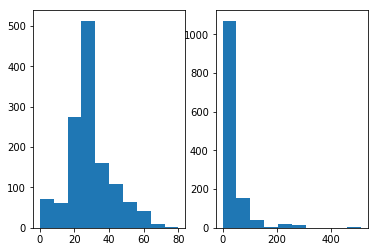

In [18]:
%matplotlib inline
# 观察连续型数值列（Age，Fare）的分布情况
import  matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.hist(features.Age)
plt.subplot(1,2,2)
plt.hist(features.Fare)

(array([ 17.,   0.,   3., 514., 250., 262., 129.,  80.,  50.,   4.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

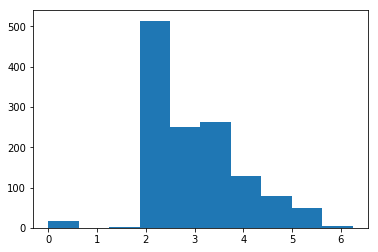

In [19]:
# Fare列数据倾斜分布较严重，对其进行对数转换
features.Fare=features.Fare.apply(lambda x:np.log(x+1))
plt.hist(features.Fare)

In [20]:
# 把连续型数值列（Age，Fare）进行归一化缩放
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
target=['Age','Fare']
features[target]=scaler.fit_transform(features[target])

In [21]:
features.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
0,0.273456,U,S,0.338125,"Braund, Mr. Owen Harris",0,3,male,1,A/5 21171
1,0.473882,C85,C,0.685892,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,PC 17599
2,0.323563,U,S,0.350727,"Heikkinen, Miss. Laina",0,3,female,0,STON/O2. 3101282
3,0.436302,C123,S,0.639463,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,113803
4,0.436302,U,S,0.352955,"Allen, Mr. William Henry",0,3,male,0,373450


#### 3. 处理分类型数据

In [22]:
features.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Ticket'],
      dtype='object')

分类型数据列：'Cabin', 'Embarked'， 'Name'，'Pclass', 'Sex', 'Ticket'  

把分类型数据和数值型数据分开，分别放在两个不同的df中

In [45]:
class_features=features[['Cabin', 'Embarked',  'Name', 'Pclass', 'Sex', 'Ticket']]

In [46]:
numerical_features=features[['Age', 'Fare','Parch','SibSp']]

#### 3.1 处理带有明显分类特征的列 — one-hot编码  

In [47]:
class_features.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [48]:
# Sex列是典型的二分类，可以直接用0,1 编码
class_features.Sex=features['Sex'].map({'male':0,'female':1})
class_features.Sex.value_counts()

D:\Anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0    843
1    466
Name: Sex, dtype: int64

In [49]:
print('Embarked','\n',class_features.Embarked.value_counts())
print('Pclass','\n',class_features.Pclass.value_counts())

Embarked 
 S    916
C    270
Q    123
Name: Embarked, dtype: int64
Pclass 
 3    709
1    323
2    277
Name: Pclass, dtype: int64


In [50]:
# 对'Embarked 和 Pclass列用 one-hot编码
Embarked_dm=pd.get_dummies(class_features.Embarked,prefix='Embarked')
Pclasss_dm=pd.get_dummies(class_features.Pclass,prefix='Pclass')

class_features=pd.concat([class_features,Embarked_dm,Pclasss_dm],axis=1)
class_features.drop(['Embarked','Pclass'],axis=1,inplace=True)


In [51]:
class_features.head(3)

,Cabin,Name,Sex,Ticket,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,U,"Braund, Mr. Owen Harris",0,A/5 21171,0,0,1,0,0,1
1,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,PC 17599,1,0,0,1,0,0
2,U,"Heikkinen, Miss. Laina",1,STON/O2. 3101282,0,0,1,0,0,1


#### 3.2 处理字符串型数据   
待处理的列： Cabin,Name,Ticket

* Cabin 列，前面第一个的字母表示客舱类别，直接把客舱类别提取出来，转化为分类型数据

In [52]:
# Cabin列提取首字母后，one-hot编码，并存入 new_Cabin 中
new_Cabin=class_features['Cabin'].apply(lambda x:x[0])
new_Cabin=pd.get_dummies(new_Cabin,prefix="Cabin")

one-hot 编码后，Cabin列转换为9列

* Ticket （船票编号）列 
把纯数字的编号单独分为一组，命名为'number',数字前面有字母的，把字母部分提取出来，数字舍去

In [53]:
new_Ticket=class_features['Ticket'].apply(lambda x: 'number' if x.isalnum() else x.split(" ")[0])
new_Ticket.value_counts()[0:10]

number        961
PC             92
C.A.           46
SOTON/O.Q.     16
W./C.          14
STON/O         14
A/5            12
CA.            12
SC/PARIS       11
CA             10
Name: Ticket, dtype: int64

In [54]:
# 提取以后，类别还是太多，有些字符中间带有 . 和 / 
# / 可能表示多种类别混合，这里只保留最前面一种
# 把字符中出现的 '.' 都删除
new_Ticket=new_Ticket.apply(lambda x: x.split('/')[0])
new_Ticket=new_Ticket.apply(lambda x:x.replace('.',''))
new_Ticket.value_counts()

number    961
PC         92
CA         69
A          36
SC         29
SOTON      27
STON       22
W          15
FCC         9
C           8
SO          8
SOC         7
PP          4
FC          3
A5          3
SW          2
WE          2
WEP         2
P           2
AQ          2
SCO         1
A4          1
LP          1
Fa          1
SP          1
SOP         1
Name: Ticket, dtype: int64

In [55]:
# 现在类别还是过多，发现有很多类别数量很少，把数量少于10个的单独取出来归为一类，命名为‘rare’
rare=new_Ticket.value_counts().keys()[8:]
rare

Index(['FCC', 'C', 'SO', 'SOC', 'PP', 'FC', 'A5', 'SW', 'WE', 'WEP', 'P', 'AQ',
       'SCO', 'A4', 'LP', 'Fa', 'SP', 'SOP'],
      dtype='object')

In [56]:
new_Ticket=new_Ticket.apply(lambda x: 'rare' if (x in rare) else x)
new_Ticket.value_counts()

number    961
PC         92
CA         69
rare       58
A          36
SC         29
SOTON      27
STON       22
W          15
Name: Ticket, dtype: int64

In [57]:
# 把 new_Ticke 进行 one-hot 编码
new_Ticket=pd.get_dummies(new_Ticket,prefix='Ticket')
new_Ticket.head(3)

,Ticket_A,Ticket_CA,Ticket_PC,Ticket_SC,Ticket_SOTON,Ticket_STON,Ticket_W,Ticket_number,Ticket_rare
0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0


处理后，Ticket 列转化为9列  
* 最后处理 Name列 ,把姓名中包含的头衔或称谓提取出来,存入新变量title中

In [58]:
string='Futrelle, Mrs. Jacques Heath (Lily May Peel)'
(string.split(',')[1]).split('.')[0].strip()

'Mrs'

In [59]:
titles=class_features['Name'].apply(lambda x: (x.split(',')[1]).split('.')[0].strip())
titles.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Capt              1
the Countess      1
Sir               1
Lady              1
Don               1
Dona              1
Mme               1
Jonkheer          1
Name: Name, dtype: int64

In [60]:
# 把title进行one-hot编码
titles=pd.get_dummies(titles,prefix='Title')
titles.head(3)

,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


* 把处理过的分类型数据列合并到一起，放入class_features，替换原来的 Cabin,Name,Ticket 列


In [61]:
class_features=pd.concat([class_features,new_Cabin,new_Ticket,titles],axis=1)
class_features.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [62]:
class_features.head(3)

,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [65]:
class_features.columns

Index(['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Ticket_A', 'Ticket_CA',
       'Ticket_PC', 'Ticket_SC', 'Ticket_SOTON', 'Ticket_STON', 'Ticket_W',
       'Ticket_number', 'Ticket_rare', 'Title_Capt', 'Title_Col', 'Title_Don',
       'Title_Dona', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

现在 class_features 总共有43列，把它跟 numerical_features合并，就是最终处理好的特征数据集（包括测试集）

In [83]:
processed_features=pd.concat([class_features,numerical_features],axis=1)
processed_features.head(3)

,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,...,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Age,Fare,Parch,SibSp
0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0.273456,0.338125,0,1
1,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0.473882,0.685892,0,1
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0.323563,0.350727,0,0


### 数据整理，保存  
* 把标签数据和特征数据重新合并
* 把训练集和测试集分开，分别存入两个csv文件

In [96]:
data_all=pd.concat([processed_features,labels],axis=1)
data_all.head(3)

,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Age,Fare,Parch,SibSp,Survived
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0.273456,0.338125,0,1,0.0
1,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0.473882,0.685892,0,1,1.0
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0.323563,0.350727,0,0,1.0


In [97]:
data_all.shape

(1309, 48)

In [98]:
# 所有数据中，前891行为训练集，后面的是测试集
train_processed=data_all[:891]
train_processed.shape

(891, 48)

In [106]:
test_processed=data_all[891:]
test_processed.drop(['Survived'],axis=1,inplace=True)
test_processed.shape

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(418, 47)

In [107]:
train_processed.to_csv('train_processed.csv',index=False)

In [108]:
test_processed.to_csv('test_processed.csv',index=False)